In [128]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [123]:
gene_list = pd.read_csv('cancerGeneList.tsv', delimiter='\t')


crispr_ = pd.read_csv('CRISPRGeneEffect.csv', index_col=0)
crispr = crispr_.T

crispr_index = []
for prot in crispr.index.tolist():
    crispr_index.append(prot[0:prot.find(' ')])
    
crispr.index = crispr_index

In [124]:
crispr_genes_ = crispr.index.tolist()
onco_driver = []
mutation_type = []
for g in crispr_genes_:
    if g in gene_list['Hugo Symbol'].tolist():
        onco_driver.append(True)
        g_ind = gene_list['Hugo Symbol'].tolist().index(g)
        mutation_type.append(gene_list['Is Oncogene'].tolist()[g_ind])
    else:
        onco_driver.append(False)
        mutation_type.append('Unknown')

In [125]:
crispr['OncoKB?'] = onco_driver
crispr

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-002284,ACH-002285,ACH-002294,ACH-002295,ACH-002296,ACH-002297,ACH-002298,ACH-002304,ACH-002305,OncoKB?
A1BG,0.014633,-0.261566,-0.028717,0.000225,0.095791,-0.108980,-0.077777,-0.053740,-0.189235,-0.009789,...,-0.092109,-0.156263,0.026595,-0.036315,-0.073879,0.084735,-0.172365,-0.033065,0.076307,False
A1CF,-0.032777,0.174833,-0.117017,-0.283124,-0.099622,0.058620,-0.078709,-0.157498,-0.035974,-0.028755,...,-0.024094,0.278745,-0.336219,-0.225388,0.046252,-0.249753,-0.112164,0.171028,-0.241877,False
A2M,-0.151299,0.106526,0.030971,0.051248,0.022204,0.172384,0.026442,0.038028,-0.081227,-0.003561,...,0.052046,0.006431,0.002214,0.114886,-0.077086,0.045093,0.055771,-0.044622,0.165187,False
A2ML1,-0.071388,0.135635,0.083795,0.120321,0.199771,0.223336,0.100746,0.057477,0.040641,0.022338,...,0.123172,0.104118,0.220993,0.164997,0.028623,0.070714,-0.017571,0.185127,-0.088436,False
A3GALT2,0.046511,-0.076753,0.032668,0.022834,-0.048126,0.119961,-0.069465,0.026942,0.073002,-0.271078,...,-0.253843,-0.221195,-0.039764,-0.049454,-0.000662,-0.194074,-0.010154,0.063611,0.031024,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.077283,-0.161894,-0.031683,-0.136990,0.086453,0.022825,-0.084500,-0.040380,-0.002087,0.000521,...,-0.128666,-0.055890,0.057139,-0.029959,-0.054452,0.029340,-0.006500,-0.079415,0.010098,False
ZYG11B,-0.294451,-0.070230,-0.291406,-0.421927,-0.166360,-0.067238,-0.110156,-0.185443,-0.123983,-0.187397,...,-0.144733,-0.241294,-0.010174,-0.058430,-0.260831,-0.120501,-0.158971,-0.130105,-0.107611,False
ZYX,0.143978,-0.006275,-0.065945,0.050002,-0.055975,-0.138806,0.002891,-0.253260,-0.090832,0.087124,...,0.027137,0.004876,0.132072,-0.013331,0.064285,-0.058169,-0.114161,0.133510,-0.108798,False
ZZEF1,0.197069,0.002458,-0.260946,-0.107675,-0.159886,-0.063841,-0.143869,0.212756,-0.182880,-0.231466,...,-0.183097,-0.149929,0.032018,-0.152010,0.041468,-0.179429,0.128512,-0.126235,0.001063,False


In [126]:
# Separate the features and target variable
X = crispr.drop('OncoKB?', axis=1)
y = crispr['OncoKB?']

# Instantiate the SMOTE algorithm
smote = SMOTE()

# Fit the SMOTE algorithm to your dataset and generate new samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data back into a single dataframe
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled
# Save the resampled data to a new file
#df_resampled.to_csv('your_resampled_dataset.csv', index=False)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-002284,ACH-002285,ACH-002294,ACH-002295,ACH-002296,ACH-002297,ACH-002298,ACH-002304,ACH-002305,OncoKB?
0,0.014633,-0.261566,-0.028717,0.000225,0.095791,-0.108980,-0.077777,-0.053740,-0.189235,-0.009789,...,-0.092109,-0.156263,0.026595,-0.036315,-0.073879,0.084735,-0.172365,-0.033065,0.076307,False
1,-0.032777,0.174833,-0.117017,-0.283124,-0.099622,0.058620,-0.078709,-0.157498,-0.035974,-0.028755,...,-0.024094,0.278745,-0.336219,-0.225388,0.046252,-0.249753,-0.112164,0.171028,-0.241877,False
2,-0.151299,0.106526,0.030971,0.051248,0.022204,0.172384,0.026442,0.038028,-0.081227,-0.003561,...,0.052046,0.006431,0.002214,0.114886,-0.077086,0.045093,0.055771,-0.044622,0.165187,False
3,-0.071388,0.135635,0.083795,0.120321,0.199771,0.223336,0.100746,0.057477,0.040641,0.022338,...,0.123172,0.104118,0.220993,0.164997,0.028623,0.070714,-0.017571,0.185127,-0.088436,False
4,0.046511,-0.076753,0.032668,0.022834,-0.048126,0.119961,-0.069465,0.026942,0.073002,-0.271078,...,-0.253843,-0.221195,-0.039764,-0.049454,-0.000662,-0.194074,-0.010154,0.063611,0.031024,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32785,-0.840969,-0.768629,-0.743229,-0.428731,-0.871541,-0.725967,-0.060453,-0.683225,-0.321256,-0.082484,...,-0.877917,-0.445783,-0.683143,-0.210763,-0.423821,-0.296622,-0.454004,-0.208431,-0.332434,True
32786,-0.070026,-0.232304,-0.560800,-0.163547,-0.194204,-0.237684,-0.252947,-0.228854,-0.211638,-0.132335,...,-0.375162,-0.184444,-0.123625,-0.198903,-0.117038,-0.188871,-0.081852,-0.280967,-0.193442,True
32787,-0.312526,-0.277604,-0.376574,-0.163007,-0.275267,-0.191803,-0.333239,-0.437191,-0.207292,-0.111089,...,-0.298517,0.027247,-0.487276,-0.445251,-0.172291,-0.295060,0.011143,-0.059796,-0.304922,True
32788,-0.024945,0.014842,0.040910,-0.027859,0.030905,0.106672,0.065559,-0.101808,0.057388,-0.006959,...,0.071524,-0.027070,-0.001280,0.013928,0.047180,0.092227,0.075344,0.063117,-0.044945,True


In [127]:
feats_ = X_resampled
label_ = y_resampled.tolist()

### Random Forest

In [319]:
depths = [2, 3, 4, 5, 10, 20, 30]
training_accs = []
testing_accs = []
for d in depths:
    clf = RandomForestClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train) 
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_pred)
    training_accs.append(acc_train)
    testing_accs.append(acc_test)
    print("Depth = " + str(d))
    print("\tTraining Accuracy = " + str(acc_train))
    print("\tTesting Accuracy = " + str(acc_test))
    

Depth = 2
	Training Accuracy = 0.6545821896919792
	Testing Accuracy = 0.6498932601402867
Depth = 3
	Training Accuracy = 0.6745959133882281
	Testing Accuracy = 0.6712412320829522
Depth = 4
	Training Accuracy = 0.6995272949069838
	Testing Accuracy = 0.6919792619701128
Depth = 5
	Training Accuracy = 0.7406221408966148
	Testing Accuracy = 0.723086306800854
Depth = 10
	Training Accuracy = 0.9117490088441598
	Testing Accuracy = 0.8787740164684354
Depth = 20
	Training Accuracy = 0.9989326014028668
	Testing Accuracy = 0.9845989630985057
Depth = 30
	Training Accuracy = 0.999961878621531
	Testing Accuracy = 0.9922232387923148


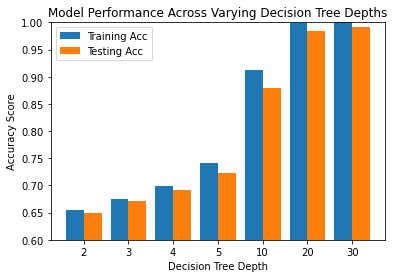

<Figure size 432x288 with 0 Axes>

In [344]:
X = depths
training_accs = training_accs
testing_accs = testing_accs
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, training_accs, 0.4, label = 'Training Acc')
plt.bar(X_axis + 0.2, testing_accs, 0.4, label = 'Testing Acc')
  
plt.xticks(X_axis, X)
plt.ylim([0.6, 1.0])
plt.xlabel("Decision Tree Depth")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Across Varying Decision Tree Depths")
plt.legend()
plt.show()
plt.savefig('depths.png')

In [305]:
n_estimators = [5, 10, 25, 50, 100, 200, 300]
training_accs_n_est = []
testing_accs_n_est = []
for n_est in n_estimators:
    clf = RandomForestClassifier(max_depth=2, n_estimators = n_est)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train) 
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_pred)
    training_accs_n_est.append(acc_train)
    testing_accs_n_est.append(acc_test)
    print("Number of Trees = " + str(n_est))
    print("\tTraining Accuracy = " + str(acc_train))
    print("\tTesting Accuracy = " + str(acc_test))

Number of Trees = 5
	Training Accuracy = 0.6328911253430924
	Testing Accuracy = 0.6311375419335163
Number of Trees = 10
	Training Accuracy = 0.6404391582799634
	Testing Accuracy = 0.63418725221104
Number of Trees = 25
	Training Accuracy = 0.646004879536444
	Testing Accuracy = 0.6444037816407441
Number of Trees = 50
	Training Accuracy = 0.6541247331503507
	Testing Accuracy = 0.6497407746264104
Number of Trees = 100
	Training Accuracy = 0.6582418420250076
	Testing Accuracy = 0.6567551082647148
Number of Trees = 200
	Training Accuracy = 0.654353461421165
	Testing Accuracy = 0.6530954559316865
Number of Trees = 300
	Training Accuracy = 0.6558783165599268
	Testing Accuracy = 0.6515706007929247


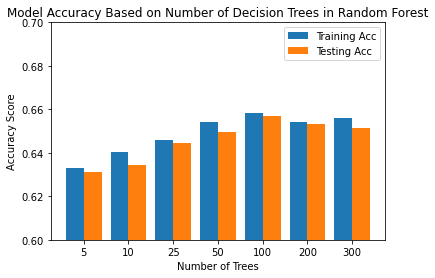

<Figure size 432x288 with 0 Axes>

In [307]:
X = n_estimators
training_accs_n_est = training_accs_n_est
testing_accs_n_est = testing_accs_n_est
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, training_accs_n_est, 0.4, label = 'Training Acc')
plt.bar(X_axis + 0.2, testing_accs_n_est, 0.4, label = 'Testing Acc')
  
plt.xticks(X_axis, X)
plt.ylim([0.6, 0.7])
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Based on Number of Decision Trees in Random Forest")
plt.legend()
plt.show()
plt.savefig('n_estimators.png')

In [308]:
n_features = [5, 25, 50, 100, 200, 300, 500, 1000, len(feats_.columns)]
training_accs_n_feats = []
testing_accs_n_feats = []
for n_feats in n_features:
    clf = RandomForestClassifier(max_depth=2, max_features = n_feats)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train) 
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_pred)
    training_accs_n_feats.append(acc_train)
    testing_accs_n_feats.append(acc_test)
    print("Number of Features = " + str(n_feats))
    print("\tTraining Accuracy = " + str(acc_train))
    print("\tTesting Accuracy = " + str(acc_test))

Number of Features = 5
	Training Accuracy = 0.6331579749923757
	Testing Accuracy = 0.6286977737114974
Number of Features = 25
	Training Accuracy = 0.6511512656297652
	Testing Accuracy = 0.6511131442512961
Number of Features = 50
	Training Accuracy = 0.6549634034766697
	Testing Accuracy = 0.6524855138761818
Number of Features = 100
	Training Accuracy = 0.6628164074412931
	Testing Accuracy = 0.6634644708752668
Number of Features = 200
	Training Accuracy = 0.6608722171393717
	Testing Accuracy = 0.6588899054589814
Number of Features = 300
	Training Accuracy = 0.6570982006709363
	Testing Accuracy = 0.6576700213479719
Number of Features = 500
	Training Accuracy = 0.6425358340957609
	Testing Accuracy = 0.6439463250991155
Number of Features = 1000
	Training Accuracy = 0.6213403476669717
	Testing Accuracy = 0.6216834400731931
Number of Features = 1078
	Training Accuracy = 0.6193961573650503
	Testing Accuracy = 0.6222933821286978


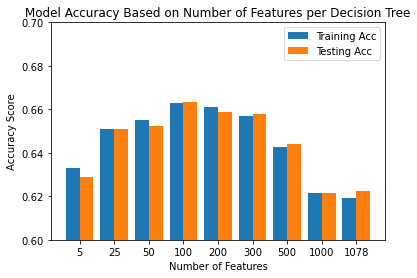

<Figure size 432x288 with 0 Axes>

In [310]:
X = n_features
training_accs_n_feats = training_accs_n_feats
testing_accs_n_feats = testing_accs_n_feats
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, training_accs_n_feats, 0.4, label = 'Training Acc')
plt.bar(X_axis + 0.2, testing_accs_n_feats, 0.4, label = 'Testing Acc')
  
plt.xticks(X_axis, X)
plt.ylim([0.6, 0.7])
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Based on Number of Features per Decision Tree")
plt.legend()
plt.show()
plt.savefig('n_features.png')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feats_, label_, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [3, 5, 10, 20],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = RandomForestClassifier(random_state=42, n_estimators=25)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))

In [322]:
rf_model = RandomForestClassifier(max_depth=8)
rf_model.fit(X_train, y_train)

y_preds = rf_model.predict(X_test)
print(classification_report(y_test, y_preds))

print(balanced_accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.73      0.81      3302
        True       0.77      0.92      0.84      3256

    accuracy                           0.82      6558
   macro avg       0.84      0.83      0.82      6558
weighted avg       0.84      0.82      0.82      6558

0.9922046723227825


In [323]:
print(accuracy_score(y_test, y_pred))

0.9922232387923148


[[2401  901]
 [ 248 3008]]


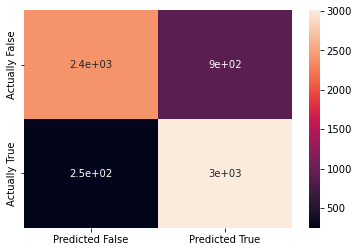

In [324]:
cf_matrix = confusion_matrix(y_test, y_preds)

xticklabels=['Predicted False', 'Predicted True']
yticklabels=['Actually False', 'Actually True']
fig_ = sns.heatmap(cf_matrix, annot=True, xticklabels=xticklabels, yticklabels=yticklabels)
fig = fig_.get_figure()
fig.savefig("confusion_matrix_random_forest.png") 
print(cf_matrix)

In [358]:
import numpy as np

clf = RandomForestClassifier(max_depth=10, n_estimators = 50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train) 
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_pred)

#importances = rf_model.feature_importances_
#len(crispr.columns.tolist())
#len(rf_model.feature_importances_)


In [393]:
print(acc_test)
print(classification_report(y_test, y_pred))

0.8769441903019213
              precision    recall  f1-score   support

       False       0.96      0.79      0.87      3302
        True       0.82      0.96      0.89      3256

    accuracy                           0.88      6558
   macro avg       0.89      0.88      0.88      6558
weighted avg       0.89      0.88      0.88      6558



In [392]:
count = 0
for t in clf.feature_importances_:
    if t > 0.01:
        print(t)
        print(count)
    count += 1

0.01128624309741546
491
0.010463384866737828
704
0.013636991468603376
862


In [390]:
feats_.columns.tolist()[862]

'ACH-001842'

### Support Vector Machine

In [9]:
X_train, X_test, y_train, y_test = train_test_split(feats_, label_, train_size=0.3, test_size=0.1, random_state=42)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.805428484293992


In [336]:
print(clf.C)
print(clf.gamma)
print(clf.kernel)
print(clf.degree)

1.0
scale
rbf
3


In [333]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.87      0.82      1607
        True       0.86      0.75      0.80      1672

    accuracy                           0.81      3279
   macro avg       0.82      0.81      0.81      3279
weighted avg       0.82      0.81      0.81      3279



In [ ]:
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=  16.7s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.786 total time=  16.5s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.778 total time=  16.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.778 total time=  16.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.794 total time=  17.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=  26.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.743 total time=  26.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=16.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=31.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.746 total time= 3.5min
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time= 3.0min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

In [63]:
with open('gridsearch_SVM.txt') as f:
    lines = f.readlines()

data_clean = []
for line_ in lines[1:]:
    data_clean.append(line_.split(','))
    
cleaned = []
folds = 1
score_avg = 0
for fold in data_clean:
    score_avg += float(fold[3][fold[3].find('score=') + 6:fold[3].find('total time=')])
    if folds % 5 == 0:
        c = float(fold[0][fold[0].find('C=') + 2:])
        gamma = float(fold[1][fold[1].find('gamma=') + 6:])
        kernel = fold[2][fold[2].find('kernel=') + 7:-1]
        score_avg = score_avg /5
        cleaned.append([c, gamma, kernel, score_avg])
        score_avg = 0

    #print(fold)
    folds+=1

cleaned = np.array(cleaned)

# C-val
#float(data_clean[0][0][data_clean[0][0].find('C=') + 2:])

# gamma val
#float(data_clean[0][1][data_clean[0][1].find('gamma=') + 6:])

#data_clean[0][2][data_clean[0][2].find('kernel=') + 7:-1]

#float(data_clean[0][3][data_clean[0][3].find('score=') + 6:data_clean[0][3].find('total time=')])

In [88]:
cleaned

array([['0.1', '0.1', 'linear', '0.7814'],
       ['0.1', '0.1', 'rbf', '0.738'],
       ['0.1', '1.0', 'linear', '0.7814'],
       ['0.1', '1.0', 'rbf', '0.534'],
       ['0.1', '10.0', 'linear', '0.7814'],
       ['0.1', '10.0', 'rbf', '0.506'],
       ['1.0', '0.1', 'linear', '0.793'],
       ['1.0', '0.1', 'rbf', '0.9511999999999998'],
       ['1.0', '1.0', 'linear', '0.793'],
       ['1.0', '1.0', 'rbf', '0.7866'],
       ['1.0', '10.0', 'linear', '0.793'],
       ['1.0', '10.0', 'rbf', '0.623']], dtype='<U32')

In [104]:
labels_ = []
for x in cleaned:
    label = 'c=' + x[0] + ', gamma=' + x[1]
    labels_.append(label)
    

array(['0.7814', '0.738', '0.7814', '0.534', '0.7814', '0.506', '0.793',
       '0.9511999999999998', '0.793', '0.7866', '0.793', '0.623'],
      dtype='<U32')

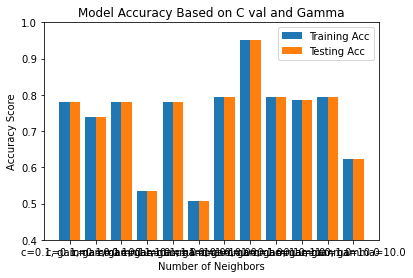

<Figure size 432x288 with 0 Axes>

In [135]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

  
X = labels_
scores_ = []
for score_ in cleaned[:,3]:
    scores_.append(float(score_))
training_acc = scores_
testing_acc = scores_

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, training_acc, 0.4, label = 'Training Acc')
plt.bar(X_axis + 0.2, testing_acc, 0.4, label = 'Testing Acc')
  
plt.xticks(X_axis, X)
plt.ylim([0.4, 1])
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Based on C val and Gamma")
plt.legend()
plt.show()
plt.savefig('SVM_hyperparam.png')

In [116]:
cleaned_lin = cleaned[cleaned[2]=='linear']
#cleaned_lin

IndexError: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 4

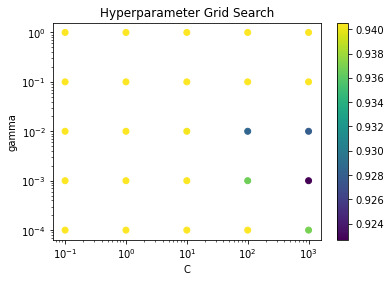

<Figure size 432x288 with 0 Axes>

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Access cv_results_ dictionary
cv_results = grid.cv_results_

# Extract C and gamma values for each hyperparameter combination
C_values = [params['C'] for params in cv_results['params']]
gamma_values = [params['gamma'] for params in cv_results['params']]

# Extract mean test score for each hyperparameter combination
mean_scores = cv_results['mean_test_score']

# Generate scatterplot
plt.scatter(C_values, gamma_values, c=mean_scores, cmap='viridis')
plt.colorbar()
plt.xlabel('C')
plt.ylabel('gamma')
plt.yscale("log")
plt.xscale("log")
plt.title('Hyperparameter Grid Search')
plt.show()
plt.savefig('svm_hyperparam.png')

In [140]:
# print best parameter after tuning
#print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)
# Access best hyperparameters and corresponding score
best_params = grid.best_params_
best_score = grid.best_score_

print('Best hyperparameters:', best_params)
print('Corresponding score:', best_score)

cv_results = grid.cv_results_
for param in cv_results.keys():

Best hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Corresponding score: 0.9405529275501483


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [149]:
crispr

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-002283,ACH-002284,ACH-002285,ACH-002294,ACH-002295,ACH-002296,ACH-002297,ACH-002298,ACH-002304,ACH-002305
A1BG,0.014633,-0.261566,-0.028717,0.000225,0.095791,-0.108980,-0.077777,-0.053740,-0.189235,-0.009789,...,-0.109261,-0.092109,-0.156263,0.026595,-0.036315,-0.073879,0.084735,-0.172365,-0.033065,0.076307
A1CF,-0.032777,0.174833,-0.117017,-0.283124,-0.099622,0.058620,-0.078709,-0.157498,-0.035974,-0.028755,...,0.069098,-0.024094,0.278745,-0.336219,-0.225388,0.046252,-0.249753,-0.112164,0.171028,-0.241877
A2M,-0.151299,0.106526,0.030971,0.051248,0.022204,0.172384,0.026442,0.038028,-0.081227,-0.003561,...,0.034826,0.052046,0.006431,0.002214,0.114886,-0.077086,0.045093,0.055771,-0.044622,0.165187
A2ML1,-0.071388,0.135635,0.083795,0.120321,0.199771,0.223336,0.100746,0.057477,0.040641,0.022338,...,0.203743,0.123172,0.104118,0.220993,0.164997,0.028623,0.070714,-0.017571,0.185127,-0.088436
A3GALT2,0.046511,-0.076753,0.032668,0.022834,-0.048126,0.119961,-0.069465,0.026942,0.073002,-0.271078,...,0.004774,-0.253843,-0.221195,-0.039764,-0.049454,-0.000662,-0.194074,-0.010154,0.063611,0.031024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.077283,-0.161894,-0.031683,-0.136990,0.086453,0.022825,-0.084500,-0.040380,-0.002087,0.000521,...,-0.093064,-0.128666,-0.055890,0.057139,-0.029959,-0.054452,0.029340,-0.006500,-0.079415,0.010098
ZYG11B,-0.294451,-0.070230,-0.291406,-0.421927,-0.166360,-0.067238,-0.110156,-0.185443,-0.123983,-0.187397,...,-0.302555,-0.144733,-0.241294,-0.010174,-0.058430,-0.260831,-0.120501,-0.158971,-0.130105,-0.107611
ZYX,0.143978,-0.006275,-0.065945,0.050002,-0.055975,-0.138806,0.002891,-0.253260,-0.090832,0.087124,...,-0.063947,0.027137,0.004876,0.132072,-0.013331,0.064285,-0.058169,-0.114161,0.133510,-0.108798
ZZEF1,0.197069,0.002458,-0.260946,-0.107675,-0.159886,-0.063841,-0.143869,0.212756,-0.182880,-0.231466,...,-0.140799,-0.183097,-0.149929,0.032018,-0.152010,0.041468,-0.179429,0.128512,-0.126235,0.001063


### kNN Classifier

In [337]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feats_, label_, test_size=0.2, random_state=42)

# Create kNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model using the training data
knn.fit(X_train, y_train)

# Predict the classes of test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5140286672766087


In [339]:
n_neighbors = [2, 5, 10, 25, 50, 100]
training_accs_n_neighbs = []
testing_accs_n_neighbs = []
for n_neighbs in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbs)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train) 
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_pred)
    training_accs_n_neighbs.append(acc_train)
    testing_accs_n_neighbs.append(acc_test)
    print("Number of Neighbors = " + str(n_neighbs))
    print("\tTraining Accuracy = " + str(acc_train))
    print("\tTesting Accuracy = " + str(acc_test))

Number of Neighbors = 2
	Training Accuracy = 1.0
	Testing Accuracy = 0.5722781335773102
Number of Neighbors = 5
	Training Accuracy = 0.5348048185422385
	Testing Accuracy = 0.5140286672766087
Number of Neighbors = 10
	Training Accuracy = 0.519289417505337
	Testing Accuracy = 0.5088441598048186
Number of Neighbors = 25
	Training Accuracy = 0.5106358645928637
	Testing Accuracy = 0.5044220799024093
Number of Neighbors = 50
	Training Accuracy = 0.5088441598048186
	Testing Accuracy = 0.5028972247636474
Number of Neighbors = 100
	Training Accuracy = 0.5073955474229949
	Testing Accuracy = 0.5009149130832571


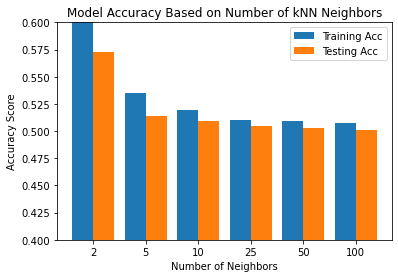

<Figure size 432x288 with 0 Axes>

In [342]:
X = n_neighbors
training_accs_n_neighbs = training_accs_n_neighbs
testing_accs_n_neighbs = testing_accs_n_neighbs
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, training_accs_n_neighbs, 0.4, label = 'Training Acc')
plt.bar(X_axis + 0.2, testing_accs_n_neighbs, 0.4, label = 'Testing Acc')
  
plt.xticks(X_axis, X)
plt.ylim([0.4, 0.6])
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Based on Number of kNN Neighbors")
plt.legend()
plt.show()
plt.savefig('kNN_neighbors.png')

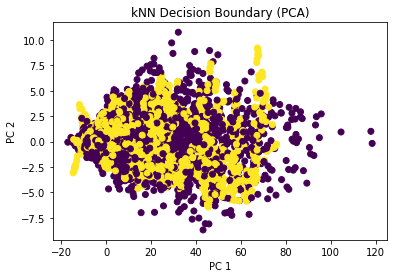

<Figure size 432x288 with 0 Axes>

In [395]:
# Apply PCA to reduce the data to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Make predictions on the reduced data
knn.fit(X_pca, y_train)
Z = knn.predict(pca.transform(X_test))

# Plot the decision boundary and the training set
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('kNN Decision Boundary (PCA)')
plt.show()
plt.savefig('kNN_PCA.png')

In [396]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train) 
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)
print(classification_report(y_test, y_pred))

0.5140286672766087
              precision    recall  f1-score   support

       False       1.00      0.03      0.07      3302
        True       0.51      1.00      0.67      3256

    accuracy                           0.51      6558
   macro avg       0.75      0.52      0.37      6558
weighted avg       0.75      0.51      0.37      6558



### Experiments with SomaticMutations dataset

In [239]:
crispr['Oncogene'] = mutation_type
crispr_oncoKB = crispr[(crispr["OncoKB?"] == True)]
crispr_oncoKB

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-002285,ACH-002294,ACH-002295,ACH-002296,ACH-002297,ACH-002298,ACH-002304,ACH-002305,OncoKB?,Oncogene
ABI1,-0.015323,-0.153653,0.041623,0.012274,-0.135040,0.267737,0.048908,-0.345755,0.025638,0.013498,...,-0.059887,-0.087799,-0.081693,-0.137819,-0.133989,-0.272981,-0.056422,-0.135212,True,No
ABL1,0.001102,0.068428,-0.040814,-0.018910,-0.342675,0.014033,-0.061610,0.146284,-0.018915,0.097560,...,-0.046970,-0.049927,0.041558,0.119677,-0.011325,0.000454,-0.134601,-0.005590,True,Yes
ABL2,0.001687,0.161510,0.118024,-0.006596,-0.038749,-0.080773,0.047445,0.125841,0.005081,0.051419,...,0.144835,0.197442,0.136436,0.103610,0.007873,0.191069,-0.072145,0.185786,True,Yes
ABRAXAS1,-0.073689,0.069484,-0.454889,-0.134028,-0.032205,-0.211455,-0.217534,-0.225299,-0.203742,-0.303454,...,-0.137088,-0.310251,-0.217512,-0.231823,-0.426982,-0.218799,-0.276311,-0.418579,True,No
ACKR3,0.103172,0.126738,0.051844,-0.012695,0.005772,-0.040650,0.123166,0.150217,-0.016629,-0.027376,...,0.020181,0.157450,0.082696,0.002716,0.042924,0.239181,0.056091,0.070828,True,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF521,-0.067657,0.061056,-0.036874,-0.056576,0.011289,0.116290,-0.017712,-0.219718,-0.107427,0.028414,...,-0.113350,-0.148695,0.054169,-0.020181,0.076977,0.102277,-0.091747,0.037691,True,No
ZNF703,-0.147918,0.205864,-0.001848,0.125686,0.115710,0.098764,0.029621,-0.020450,-0.110751,0.002332,...,0.050568,0.048282,0.135033,0.086925,0.035183,0.089056,0.139592,-0.092397,True,No
ZNF750,-0.063012,0.018446,-0.101505,-0.207085,-0.150986,-0.078461,-0.134297,-0.054563,-0.056071,-0.296865,...,-0.122953,-0.058947,-0.039999,0.105489,-0.094353,0.092060,-0.176598,-0.036639,True,No
ZNRF3,-0.005314,0.072252,0.168717,-0.007025,0.157035,-0.001494,-0.076224,-0.052813,0.081942,-0.040513,...,0.068567,0.027048,-0.157583,0.121925,0.166775,0.141764,0.014266,0.277323,True,No
